<a href="https://colab.research.google.com/github/eswarpeddinti98/newproject/blob/main/04_FashionMNIST_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge: Get the best results on the [fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset!

> "Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits."

<img src="https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png">


TASK - Challenge: Get the best results on the fashionMNIST dataset!

The challenge of this task is to get the best results on the fashionMNIST dataset by tuning hyperparameters of the model and observing convergence behavior.

"Best" - for simplicity - means the highest accuracy on the validation set.

"Rules":

    You can change any hyperparameters,
    including the number of layers,
    width of the layers,
    activation functions,
    regularizers (and their parameters),
    optimizer (and it's parameters), but
    you should not change the model architecture, use only fully connected layers! (Even if you know any others... :-P

Added constraint: The model with the "best performance" has to be saved, so it should not be just a printout happening once during training!

And: You may NOT manipulate the validation set! :-P

Happy coding! :-)


# Preparation
In PyTorch, we can use our GPU in our operations by setting the [device](https://pytorch.org/docs/stable/tensor_attributes.html#torch.device) to `cuda`. The function `torch.cuda.is_available()` will confirm PyTorch can recognize the GPU.

In [1]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

False

# Loading the data
The [TorchVision](https://pytorch.org/vision/stable/index.html) library provides helper methods for [many common datasets](https://pytorch.org/vision/main/datasets.html), including MNIST.

But let's assume that we receive the dataset in NumPy arrays.

In [2]:
import tensorflow as tf

(train_images, train_labels), (valid_images, valid_labels) = tf.keras.datasets.fashion_mnist.load_data()

print(train_images.shape, valid_images.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28) (10000, 28, 28)


The classes are:
0.   T-shirt/top
1.   Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

In [3]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Get one image out of the dataset

In [4]:
x_0 = train_images[0]
x_0

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

# Tensors
Let's convert our images into tensors so we can later process them with a neural network

In [5]:
x_0_tensor = torch.tensor(x_0)
x_0_tensor.size()

torch.Size([28, 28])

In [6]:
x_0_tensor

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

By default, a tensor is processed with a CPU. We can send our tensor to the device we identified at the start of this notebook. This way, our code will run much faster if a GPU is available.

In [7]:
x_0_tensor.to(device).device

device(type='cpu')

# Create a Dataset
Let's add the steps above into our `MyDataset` class.

In [13]:
from torch.utils.data import Dataset, DataLoader
import torch

class MyDataset(Dataset):
    def __init__(self, images, labels, device):
        self.device = device
        # Convert image values to the range between 0 and 1
        x = images / 255.0
        # Convert to tensor, convert tensor to float, then copy the result to GPU
        self.xs = torch.tensor(x, dtype=torch.float32, device=self.device)
        # Convert labels to tensor, then copy it to GPU
        self.ys = torch.tensor(labels, dtype=torch.long, device=self.device)

    def __getitem__(self, idx):
        x = self.xs[idx]
        y = self.ys[idx]
        return x, y

    def __len__(self):
        return len(self.xs)

# DataLoaders
If our dataset is a deck of flash cards, a [DataLoader](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#preparing-your-data-for-training-with-dataloaders) defines how we pull cards from the deck to train an AI model. We could show our models the entire dataset at once. Not only does this take a lot of computational resources, but [research shows](https://arxiv.org/pdf/1804.07612) using a smaller batch of data is more efficient for model training.

For example, if our `batch_size` is 32, we will train our model by shuffling the deck and drawing 32 cards. We do not need to shuffle for validation as the model is not learning, but we will still use a `batch_size` to prevent memory errors.

The batch size is something the model developer decides, and the best value will depend on the problem being solved. Research shows 32 or 64 is sufficient for many machine learning problems and is the default in some machine learning frameworks, so we will use 32 here.

In [14]:
from torch.utils.data import Dataset, DataLoader

BATCH_SIZE = 32

train_data = MyDataset(train_images, train_labels, device)  # Assuming device is defined
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
train_N = len(train_loader.dataset)

# Validation set setup
valid_data = MyDataset(valid_images, valid_labels, device)  # Using the same MyDataset class
valid_loader = DataLoader(valid_data, batch_size=BATCH_SIZE, shuffle=False)  # No shuffling for validation
valid_N = len(valid_loader.dataset)

# Model
It's time to build the model! Neural networks are composed of layers where each layer performs a mathematical operation on the data it receives before passing it to the next layer. To start, we will create a "Hello World" level model made from 4 components:

1. A [Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) used to convert n-dimensional data into a vector.
2. An input layer, the first layer of neurons
3. A hidden layer, another layor of neurons "hidden" between the input and output
4. An output layer, the last set of neurons which returns the final prediction from the model

More information about these layers is available in [this blog post](https://medium.com/@sarita_68521/basic-understanding-of-neural-network-structure-eecc8f149a23) by Sarita.

Let's create a `layers` variable to hold our list of layers.

In [15]:
import torch.nn as nn

input_size = 784
n_classes = 10

# TODO: Design this network: Input -> 64 neurons -> ReLU -> 64 neurons -> ReLU -> Output
model = nn.Sequential(
    nn.Flatten(),  # Flatten the 28x28 image into a 784-dimensional vector
    nn.Linear(input_size, 64),  # Input layer to first hidden layer (64 neurons)
    nn.ReLU(),  # ReLU activation function
    nn.Linear(64, 64),  # First hidden layer to second hidden layer (64 neurons)
    nn.ReLU(),  # ReLU activation function
    nn.Linear(64, n_classes)  # Second hidden layer to output layer (n_classes neurons)
)


Much like tensors, when the model is first initialized, it will be processed on a CPU. To have it process with a GPU, we can use `to(device)`.
[PyTorch 2.0](https://pytorch.org/get-started/pytorch-2.0/) introduced the ability to compile a model for faster performance. Learn more about it [here](https://pytorch.org/tutorials/intermediate/torch_compile_tutorial.html).

In [16]:
model = torch.compile(model.to(device))
model

OptimizedModule(
  (_orig_mod): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=10, bias=True)
  )
)

## Loss, optimization and compilation

In [17]:
from torch.optim import Adam

# Loss
loss_function = nn.CrossEntropyLoss() # we use this cross entropy variant as the input is not
                                       # one-hot encoded

# Optimizer
optimizer = Adam(model.parameters()) # A "smart" SGD variant

We'll make a function to calculate the accuracy for each batch. The result is a fraction of the total accuracy, so we can add the accuracy of each batch together to get the total.



In [18]:
def get_batch_accuracy(output, y, N):
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(y.view_as(pred)).sum().item()
    return correct / N

## Training

In [19]:
def save(history, loss, accuracy):
    if 'loss' not in history:
        history['loss'] = []

    if 'accuracy' not in history:
        history['accuracy'] = []

    history['loss'].append(loss)
    history['accuracy'].append(accuracy)

Below is the function we've defined to train our model based on the training data.

In [22]:
def train(history):
    loss = 0
    accuracy = 0

    model.train()  # Set the model to training mode
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)  # Move data to the correct device

        # Calculate y_hat in a forward pass
        output = model(x)

        # ... (rest of the training code, with proper indentation)
        optimizer.zero_grad()
        batch_loss = loss_function(output, y)
        batch_loss.backward()
        optimizer.step()

        loss += batch_loss.item()
        accuracy += get_batch_accuracy(output, y, train_N)

    print('loss: {:.4f} - accuracy: {:.4f}'.format(loss, accuracy), end='')
    save(history, loss, accuracy)

Similarly, this is the code for validating the model with data it did not train on.

In [26]:
def validate(history):
    model.eval()  # Set the model to evaluation mode
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for x, y in valid_loader:  # Retrieve data and labels from the validation loader
            x, y = x.to(device), y.to(device)  # Move data to the appropriate device (e.g., GPU or CPU)
            output = model(x)  # Forward pass
            loss = criterion(output, y)  # Compute loss
            val_loss += loss.item()

            # Compute accuracy
            _, predicted = torch.max(output, 1)
            val_correct += (predicted == y).sum().item()
            val_total += y.size(0)

    # Calculate average loss and accuracy for validation
    avg_loss = val_loss / len(valid_loader)
    accuracy = val_correct / val_total

    print(f"Validation - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

    # Store metrics in history
    history.setdefault('loss', []).append(avg_loss)
    history.setdefault('accuracy', []).append(accuracy)


To see how the model is progressing, we will alternated between training and validation. Just like how it might take a student a few times going through their deck of flash cards to learn all the concepts, the model will go through the training data multiple times to get a better and better understanding.

An epoch is one complete pass through the entire dataset. Let's train and validate the model for 10 epochs to see how it learns.

In [28]:
epochs = 10
import torch.nn as nn

# Define criterion (loss function)
criterion = nn.CrossEntropyLoss()

for epoch in range(epochs):
    print('Epoch: {}'.format(epoch))
    train(train_history)  # Assuming train() is implemented correctly
    validate(val_history)  # Use the fixed validate() function


Epoch: 0
loss: 613.3700 - accuracy: 0.8794Validation - Loss: 0.3710, Accuracy: 0.8644
Epoch: 1
loss: 581.5505 - accuracy: 0.8869Validation - Loss: 0.4168, Accuracy: 0.8469
Epoch: 2
loss: 555.7385 - accuracy: 0.8895Validation - Loss: 0.3675, Accuracy: 0.8693
Epoch: 3
loss: 530.2229 - accuracy: 0.8949Validation - Loss: 0.3450, Accuracy: 0.8747
Epoch: 4
loss: 508.2012 - accuracy: 0.8981Validation - Loss: 0.3553, Accuracy: 0.8738
Epoch: 5
loss: 492.0741 - accuracy: 0.9013Validation - Loss: 0.3391, Accuracy: 0.8809
Epoch: 6
loss: 476.7696 - accuracy: 0.9045Validation - Loss: 0.3326, Accuracy: 0.8825
Epoch: 7
loss: 461.3973 - accuracy: 0.9070Validation - Loss: 0.3368, Accuracy: 0.8820
Epoch: 8
loss: 445.7882 - accuracy: 0.9101Validation - Loss: 0.3448, Accuracy: 0.8776
Epoch: 9
loss: 436.3781 - accuracy: 0.9125Validation - Loss: 0.3572, Accuracy: 0.8769


## Training Performance

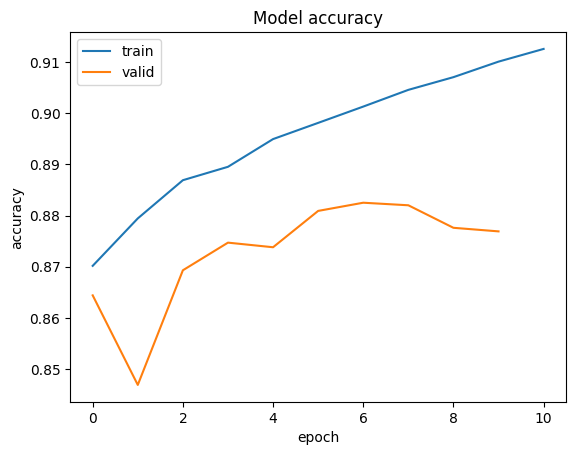

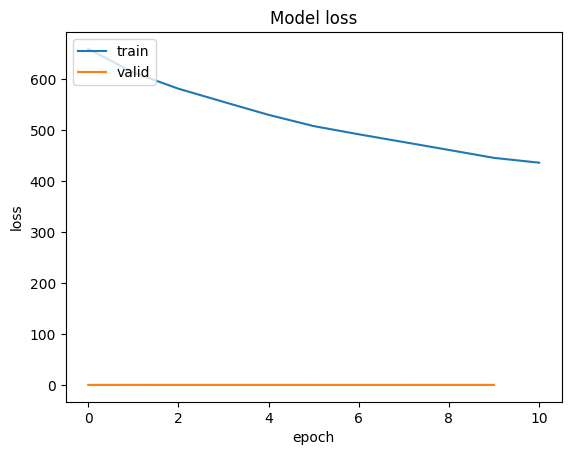

In [29]:
from matplotlib import pyplot as plt

def display_history(train, val):
    """Summarize history for accuracy and loss.
    """
    plt.plot(train['accuracy'])
    plt.plot(val['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

    plt.plot(train['loss'])
    plt.plot(val['loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

display_history(train_history, val_history)

## Quality Check

In [30]:
assert max(train_history['accuracy'])>0.72
assert max(val_history['accuracy'])>0.73

## Visualization

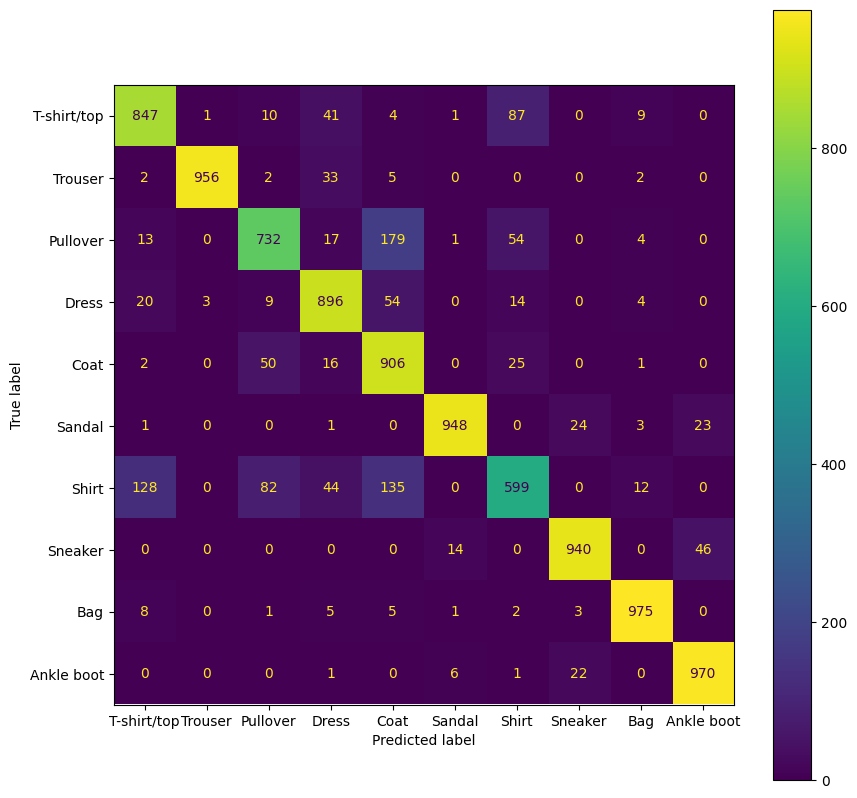

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch

predictions = []
targets = []

# Iterate over test data
for images, labels in valid_loader:
    # TODO: Calculate output based on input "images"
    # Pass the input images through the model
    images = images.to(device)  # Move images to the same device as the model
    labels = labels.to(device)  # Move labels to the same device as the model
    output = model(images)  # Forward pass to get the predictions

    # Prediction is a tensor
    prediction = output.argmax(dim=1)  # Get the class with the highest score

    # TODO: Copy tensors "prediction" and "labels" back to CPU and convert them to numpy arrays
    np_prediction = prediction.cpu().numpy()  # Move tensor to CPU and convert to numpy
    np_labels = labels.cpu().numpy()  # Move tensor to CPU and convert to numpy

    predictions.extend(np_prediction)  # Add predictions to the list
    targets.extend(np_labels)  # Add true labels to the list

# Create confusion matrix
cm = confusion_matrix(targets, predictions)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10, 10))
cmd.plot(ax=ax)


In [32]:
from sklearn.metrics import classification_report

print(classification_report(targets, predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       1.00      0.96      0.98      1000
           2       0.83      0.73      0.78      1000
           3       0.85      0.90      0.87      1000
           4       0.70      0.91      0.79      1000
           5       0.98      0.95      0.96      1000
           6       0.77      0.60      0.67      1000
           7       0.95      0.94      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

